In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle (1).json to kaggle (1).json
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d shreyshi/adultcsv

Dataset URL: https://www.kaggle.com/datasets/shreyshi/adultcsv
License(s): unknown
100% 652k/652k [00:00<00:00, 1.48MB/s]
100% 652k/652k [00:00<00:00, 1.48MB/s]


In [3]:
! pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 2.0 MB/s eta 0:00:00


In [4]:
import patoolib

In [5]:
patoolib.extract_archive("/content/adultcsv.zip")

INFO patool: Extracting /content/adultcsv.zip ...
INFO:patool:Extracting /content/adultcsv.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_tnosimco -- /content/adultcsv.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_tnosimco -- /content/adultcsv.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/adultcsv.zip extracted to `adult.csv'.
INFO:patool:... /content/adultcsv.zip extracted to `adult.csv'.


'adult.csv'

In [6]:
import patoolib

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv("/content/adult.csv")
data.head(15)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [9]:
data.shape

(48842, 15)

## Finding Full null values

In [10]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [11]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [12]:
data.workclass.replace({'?':'Others'},inplace=True)
# data.workclass.replace(('?','Others'),inplace=True)
print('Workclass')
print(data['workclass'].value_counts())

Workclass
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [13]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [14]:
print(data.education.value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [15]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [16]:
data.occupation.replace({'?':'Other-service'},inplace=True)

In [17]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

Finding and handling outliers

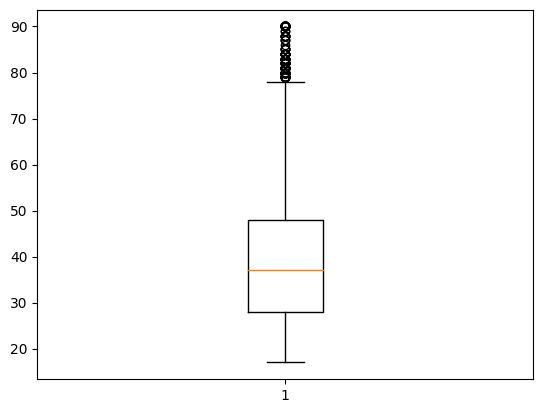

In [18]:
plt.boxplot(data['age'])
plt.show()

In [19]:
data=data[(data['age']<=75) & (data['age']>=17)]

In [20]:
# outlier removing / dataset cleaning by mutual understanding

In [21]:
data.shape

(48469, 15)

In [22]:
data.workclass.value_counts()

workclass
Private             33756
Self-emp-not-inc     3796
Local-gov            3110
Others               2700
State-gov            1979
Self-emp-inc         1669
Federal-gov          1428
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [23]:
# in the above code 'without pay and never worked' having very less count as well as they are not earning
# so not required for income prediction
# so we can remove such a data

data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']

In [24]:
data.shape

(48438, 15)

In [25]:
data.education.value_counts()

education
HS-grad         15655
Some-college    10824
Bachelors        7983
Masters          2634
Assoc-voc        2053
11th             1801
Assoc-acdm       1592
10th             1373
7th-8th           899
Prof-school       819
9th               745
12th              654
Doctorate         587
5th-6th           498
1st-4th           239
Preschool          82
Name: count, dtype: int64

In [26]:
# here also we can eliminate some categories like '1st -4th' '5th-6th','preschool'
data=data[data['education']!='1st-4th']
data=data[data['education']!='5th-6th ']
data=data[data['education']!='Preschool']


In [27]:
data.shape

(48117, 15)

In [28]:
#now the 'education' and 'education-num' are giving us same information so will keep only one of them
# here i will remove the text data column 'education'
data.drop(columns=['education'],inplace=True)
data.columns

<ipython-input-28-0a3a9e9d7e89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['education'],inplace=True)


Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [29]:
data.shape

(48117, 14)

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])
data['marital-status']=encoder.fit_transform(data['marital-status'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])
data['native-country']=encoder.fit_transform(data['native-country'])


In [31]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,10,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,7,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,12,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [32]:
#splitting data in to X(indepedent variable) and Y(dependent variable)


In [33]:
X=data.drop(columns=['income'])
Y=data['income']
X

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,10,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,7,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,12,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [34]:
Y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48117, dtype: object

In [35]:
# Min MAx scaller will convert entire data in one range that  is 0 to 1

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [37]:
X

array([[0.13793103, 0.5       , 0.14512876, ..., 0.        , 0.39795918,
        0.95121951],
       [0.36206897, 0.5       , 0.05245126, ..., 0.        , 0.5       ,
        0.95121951],
       [0.18965517, 0.16666667, 0.21964867, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.70689655, 0.5       , 0.09446153, ..., 0.        , 0.39795918,
        0.95121951],
       [0.0862069 , 0.5       , 0.12800425, ..., 0.        , 0.19387755,
        0.95121951],
       [0.60344828, 0.66666667, 0.18648211, ..., 0.        , 0.39795918,
        0.95121951]])

In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=True,stratify=Y)
# here random_state= True suggest that the records getting choosen for training
# and testing will be in random order
# statify= Y we use only for clssification task
# statify maintains the categorical ration in output column (Y) while getting choosen for training and testing


In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predict=knn.predict(xtest)
predict

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.8208645054031588

In [41]:
# for k in range(1,100,2):
#   knn=KNeighborsClassifier(n_neighbors=k)
#   knn.fit(xtrain,ytrain)
#   predict=knn.predict(xtest)
#   print("k={} acuuracy={}".format(k,accuracy_score(ytest,predict)))


In [42]:
#from sklearn.model_selection import GridSearchCV
#knn=KNeighborsClassifier(n_jobs=-1)
#param_grid={
#   'n_neighbors':[19,21,23],
#   'weights':['uniform','distance'],
#   'algorithm':['auto','ball_tree','kd_tree','brute']
#}
#gsv=GridSearchCV(knn,param_grid,n_jobs=-1,refit=True,verbose=3)
#gsv.fit(xtrain,ytrain)
# prediction=gsv.predict(xtest)
# print(gsv.best_params_)
# print(gsv.best_score_)
# print(accuracy_score(ytest,prediction))


# @title Default title text
from sklearn.model_selection import RandomizedSearchCV
knn=KNeighborsClassifier(n_jobs=-1)
param_grid={
    'n_neighbors':[19,21,23],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
}
rsv=RandomizedSearchCV(knn,param_grid,n_jobs=-1,refit=True,verbose=3)
rsv.fit(xtrain,ytrain)
predictions=gsv.predict(xtest)
print(rsv.best_params_)
print(rsv.best_score_)
print(accuracy_score(ytest,prediction))

In [43]:
# from sklearn.neighbors import KNeighborsClassifier
#knn=KNeighborsClassifier('weights': 'distance', 'n_neighbors': 23, 'algorithm': 'brute')
#knn.fit(xtrain,ytrain)
#predict=knn.predict(xtest)
#predict

In [44]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
predict=lr.predict(xtest)
predict

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.8232543640897756

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt=dt.fit(xtrain,ytrain)
predict=dt.predict(xtest)
predict

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [47]:
feature_cols=['age','workclass','fnlwgt','education-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country']